# Projeto Final

Carregando os dados no dataset e fazendo as importações das libs

In [76]:
# pip install tensorflow

In [77]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import StratifiedKFold


import psutil
import time

In [78]:
df = pd.read_csv('datasets/houses_to_rent_v2.csv')

In [79]:
df.shape

(10692, 13)

Fazendo a verificação do dataset:
 * Colunas presentes no dataset;
 * Existência de dados faltantes;
 * O tipo dos dados presente no dataset;

E fazendo o devido tratamento, caso seja necessário.

In [80]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [81]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [82]:
df['city'].value_counts(sort=True, ascending=True)


Campinas           853
Porto Alegre      1193
Belo Horizonte    1258
Rio de Janeiro    1501
São Paulo         5887
Name: city, dtype: int64

In [83]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [84]:
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


# Tratando Valores Categóricos

* City
* Floor
* Animal
* Furniture

In [85]:
arr_col = ['city','furniture', 'animal', 'floor']

for a in arr_col:
    df[a]=df[a].factorize()[0]

In [86]:
df.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,1.102319,149.217920,2.506079,2.236813,1.609147,7.501122,0.222222,0.756266,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,1.434833,537.016942,1.171266,1.407198,1.589521,5.495272,0.415759,0.429354,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,0.000000,56.000000,2.000000,1.000000,0.000000,4.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,0.000000,90.000000,2.000000,2.000000,1.000000,5.000000,0.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,2.000000,182.000000,3.000000,3.000000,2.000000,11.000000,0.000000,1.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,4.000000,46335.000000,13.000000,10.000000,12.000000,34.000000,1.000000,1.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [87]:
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,70,2,1,1,0,0,0,2065,3300,211,42,5618
1,0,320,4,4,0,1,0,1,1200,4960,1750,63,7973
2,1,80,1,1,1,2,0,1,1000,2800,0,41,3841
3,1,51,2,1,0,3,0,1,270,1112,22,17,1421
4,0,25,1,1,0,4,1,1,0,800,25,11,836
5,0,376,3,3,7,5,0,1,0,8000,834,121,8955
6,2,72,2,1,0,0,0,1,740,1900,85,25,2750
7,0,213,4,4,4,6,0,1,2254,3223,1735,41,7253
8,0,152,2,2,1,7,0,0,1000,15000,250,191,16440
9,2,35,1,1,0,3,0,0,590,2300,35,30,2955


In [88]:
#Campinas = 3 | Porto Alegre = 1 | Belo Horizonte = 4 | Rio de Janeiro = 2 | São Paulo = 0
cities = df['city'].value_counts(sort=True, ascending=True)

names = ['Campinas', 'Porto Alegre', 'Belo Horizonte', 'Rio de Janeiro', 'São Paulo']
df_cities = pd.DataFrame(cities)
df_cities = df_cities.rename(columns={'city':'Valores'})
df_cities['Nomes'] = names


df_cities

,Valores,Nomes
3,853,Campinas
1,1193,Porto Alegre
4,1258,Belo Horizonte
2,1501,Rio de Janeiro
0,5887,São Paulo


Separando o dataset Por Cidade

## Criando um dicionário para se guardar os dados separados por cidade, em que:
    ** Campinas é a cidade com valor 3; 
    ** Porto Alegre é a cidade com valor 1;
    ** Belo Horizonte é a cidade com valor 4;
    ** Rio de Janeiro é a cidade com valor 2;
    ** São Paulo é a cidade com valor 0;

In [89]:
df_City = {'nomes': names}
for index,row in df_cities.iterrows():
     df_City[row['Nomes']] = pd.DataFrame(df[df['city'] == index])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d4c6a7950>,
      dtype=object)

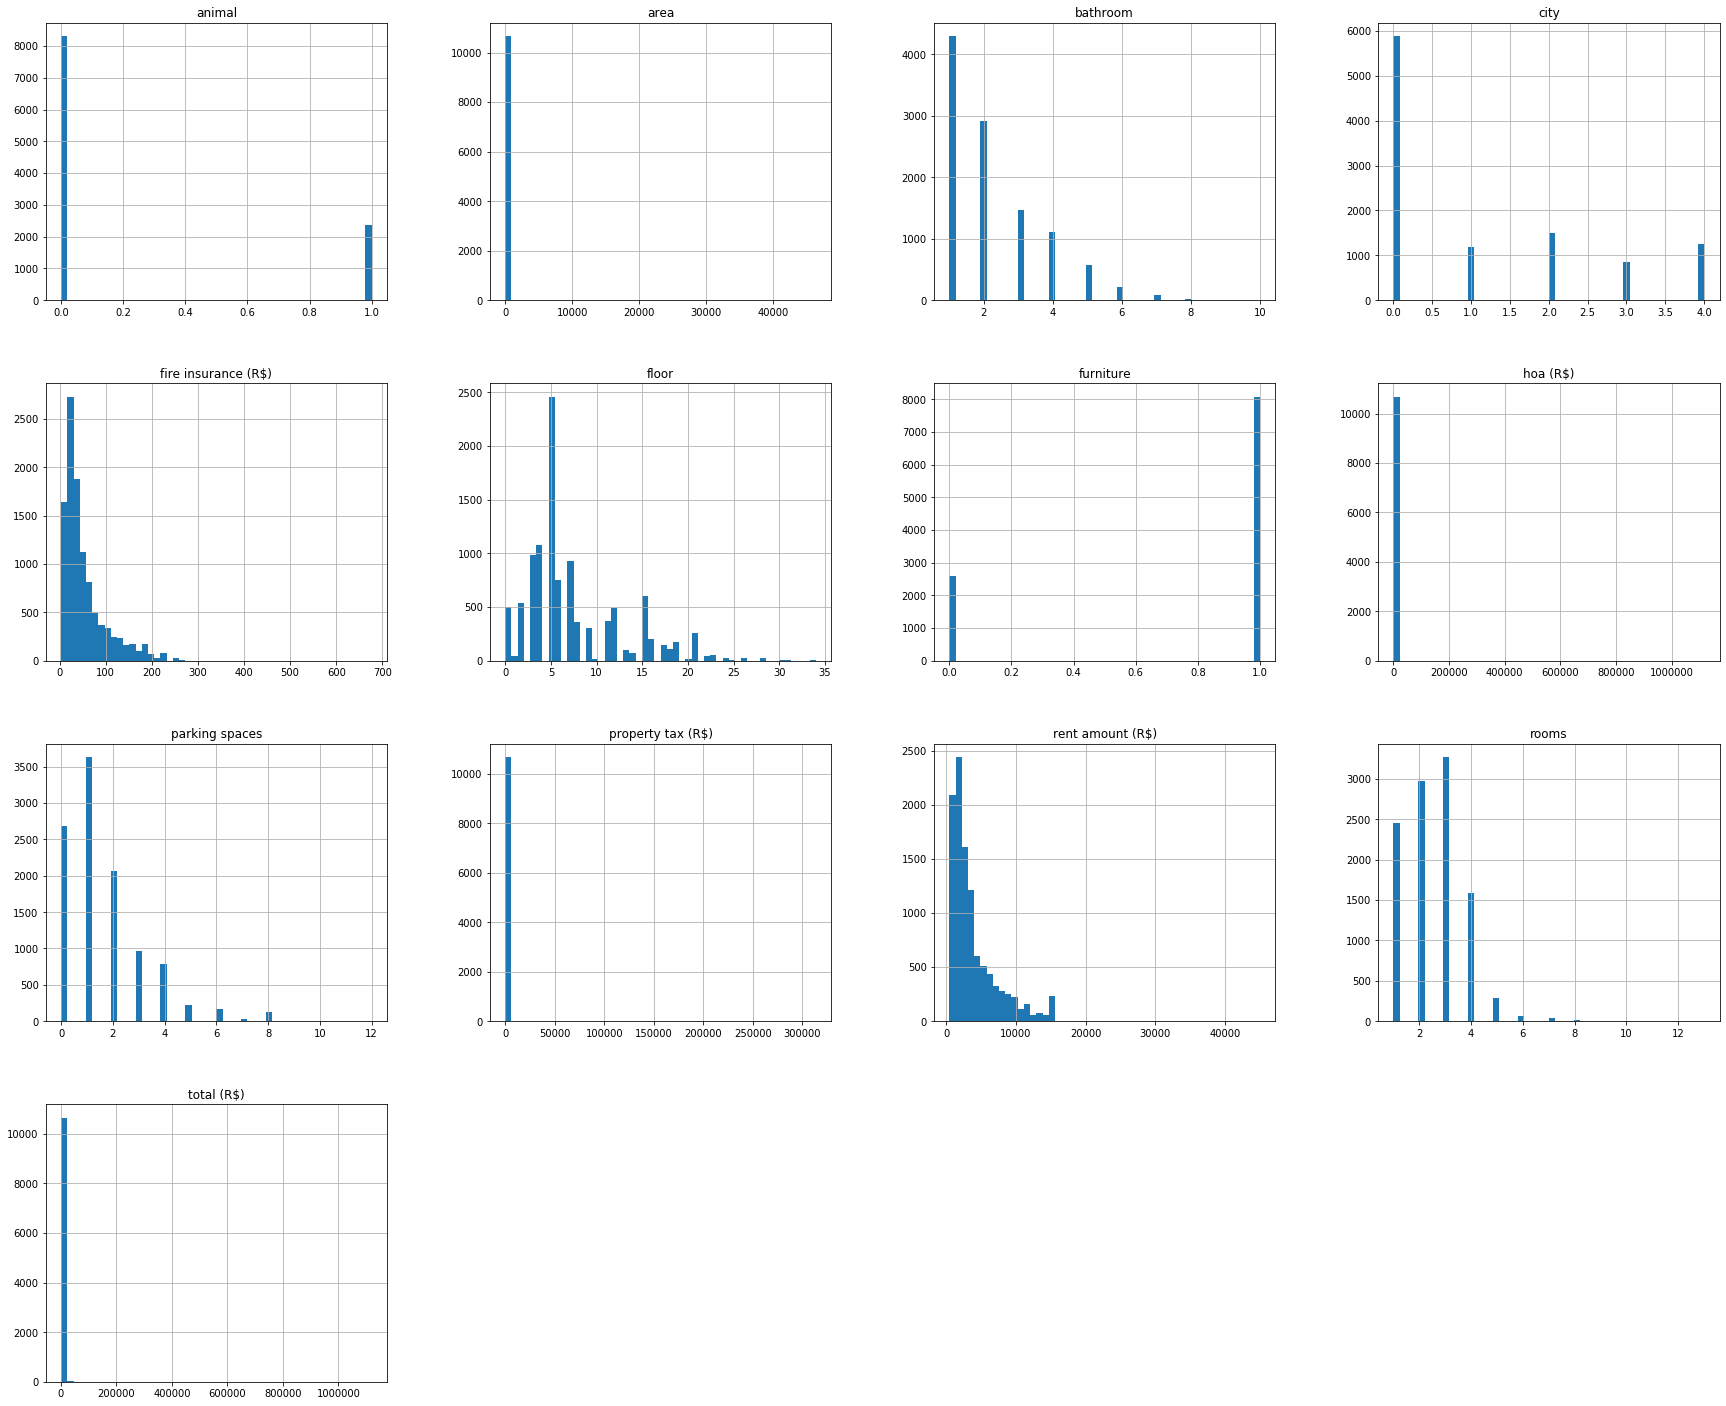

In [90]:
df.hist(bins=50, figsize=(30,25))

Verificando as correlações entre os atributos do dataset

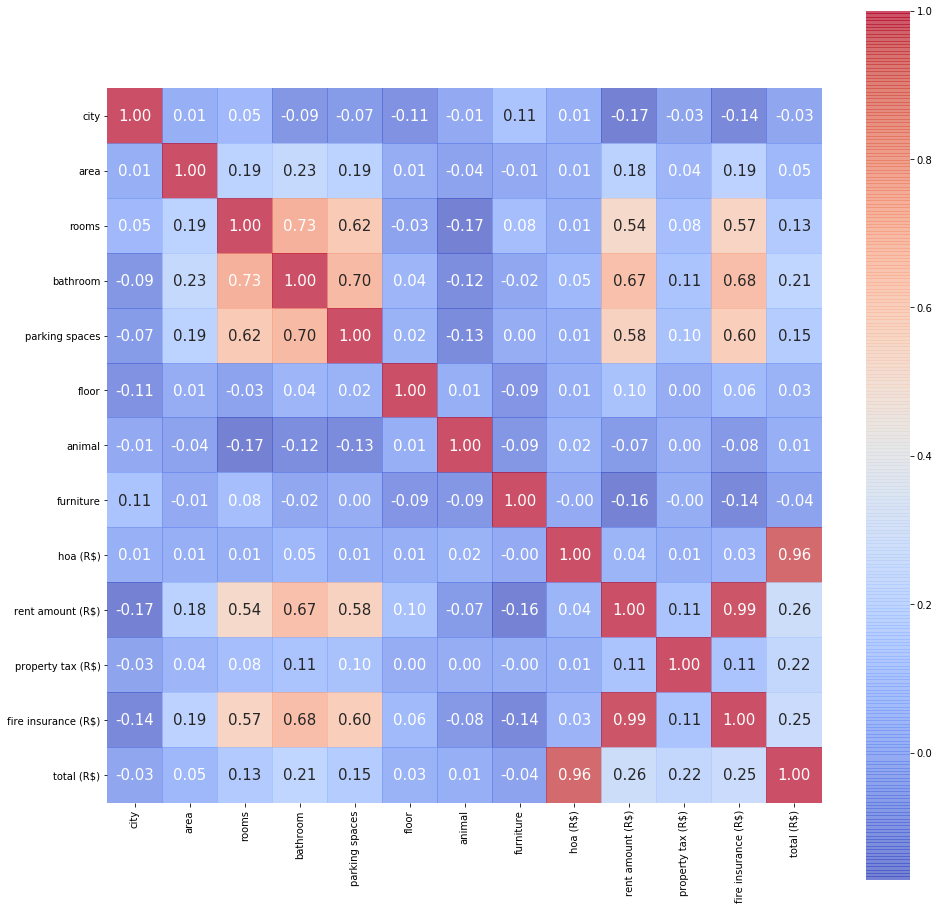

In [91]:
#columns_dataset = df.columns[:-1].tolist()

columns_dataset = df.columns.tolist()

cors = df[columns_dataset].corr()
plt.figure(figsize=(16,16))

sns.heatmap(cors, cbar=True, square=True, annot=True, fmt=".2f", 
            annot_kws={'size': 15}, xticklabels=columns_dataset, 
            yticklabels=columns_dataset, alpha = 0.7, cmap="coolwarm")

plt.savefig('correlacao.svg', format='svg')
plt.show()

In [92]:
cat_corr = ['hoa (R$)','bathroom', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']

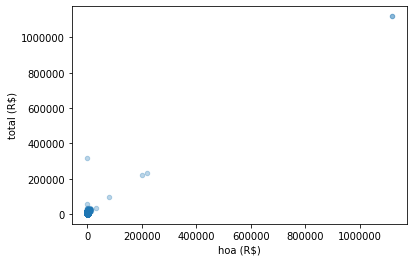

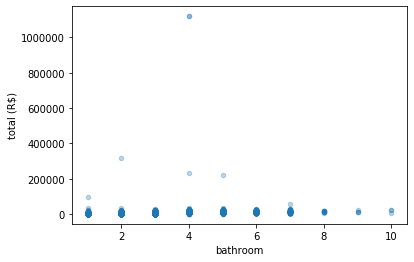

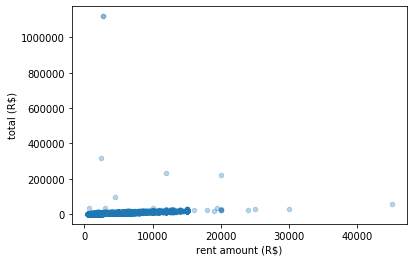

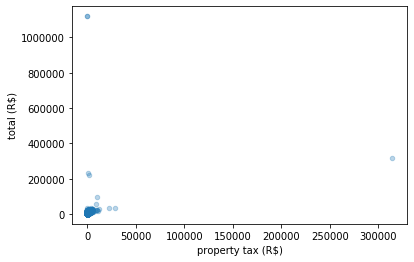

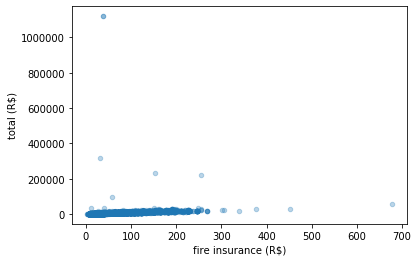

In [93]:
for i in cat_corr:
    df.plot(kind='scatter', x=i, y='total (R$)', alpha=0.3)


# Separando o conjunto de treino e teste

In [94]:
X = df.drop('total (R$)', axis=1).values
y = df['total (R$)'].values.reshape(-1,1)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Dados normalizados:

In [96]:
#min-max
df_norml = (x_train - x_train.mean())/(x_train.max() - x_train.min())
y_norml = (y_train - y_train.mean())/(y_train.max() - y_train.min())

In [97]:
sc_x = StandardScaler()
x_train_scal = sc_x.fit_transform(x_train)
x_test_scal = sc_x.transform(x_test)

sc_y = StandardScaler()
y_train_scal = sc_y.fit_transform(y_train)
y_test_scal = sc_y.transform(y_test)


#z-score
#x_train_scal = (x_train - x_train.mean())/(x_train.std())
#y_train_scal = (y_train - y_train.mean())/(y_train.std())

#x_test_scal = (x_test - x_test.mean())/(x_test.std())
#y_test_scal = (y_test - y_test.mean())/(y_test.std())

#input_values = (input_df - input_df.mean()) / (input_df.std())
#output_values = (output_df - output_df.mean()) / (output_df.std())

In [98]:
#std_df = StandardScaler()

# Algoritmos de Machine Learning

* Regressão Linear
* Árvore de Decisão
* Random Forest
* Elastic Net
* SVR

In [99]:
models_list = []

In [100]:
"""
    Função para os métodos de Validação dos modelos.
"""

def metrics_validation(model, input_values, output_values, input_test, output_test):
    
    #SCORE MODEL
    r2_train = model.score(input_values, output_values)
    r2_test = model.score(input_test, output_test)

    print("R2 Treinamento: %.7f"%r2_train)
    print("R2 Teste: %.7f"%r2_test)
    
    
    #MSE RMSE
    pred_model = model.predict(input_values)
    mse_model = mean_squared_error(output_values, pred_model)
    rmse_model = np.sqrt(mse_model)

    print('MSE: ', mse_model)
    print('RMSE: ', rmse_model)

    
def cross_validation(model, input_df, output_df, model_name):
    #Cross Validation
    
    """
        As duas abordagens, tanto normalizando, como padronizando os dados
        ao serem recebidos para se aplicar a validação cruzada, dão resultados
        equivalentes após se treinar os modelos nos modelos:
            - Regressão Linear;
            - Decision Tree;
            - Random Forest;
            
    
    """
    
    #normalizando os dados recebidos...
    #min-max
    #input_values = (input_df - input_df.mean()) / (input_df.max() - input_df.min())
    #output_values = (output_df - output_df.mean()) / (output_df.max() - output_df.min())
    
    #padronizando os dados recebidos...
    #z-score
    input_values = (input_df - input_df.mean()) / (input_df.std())
    output_values = (output_df - output_df.mean()) / (output_df.std())
    
    scores_values = cross_val_score(model, input_values, 
                                  output_values, 
                                #scoring="neg_mean_squared_error",
                                 # scoring="accuracy",
                                  scoring='r2',
                                  cv=5)
    #rmse_scores_values = np.sqrt(-scores_values)
    
    #print('Scores: ', rmse_scores_values)
    #print('Média Scores: ', rmse_scores_values.mean())
    #print('Desvio Padrão Scores: ', rmse_scores_values.std())
    
    print('Scores: ', scores_values)
    print('Média Scores: %0.6f'%scores_values.mean())
    print('Desvio Padrão: %0.6f'%scores_values.std())
    
    return {'nome':model_name,'score':scores_values.mean()}
    #models_dict[model_name] = scores_values.mean()
    
#     print("Accuracy: %0.2f (+/- %0.2f)" % (scores_values.mean(), scores_values.std() * 2))

In [101]:
#Plotagem do gráfico de predição(Acurácia):

def graphics_plot(y_real_value, y_results_predict, model_name):
    #plt.scatter(y_test_scal, pred_mlp)
    fig=plt.figure(figsize=(7,7))
    plt.scatter(y_real_value, y_results_predict, color='red')
    plt.xlabel('Test Values')
    plt.ylabel('Predictions - {}'.format(model_name))
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-200, 200], [-200, 200], color='blue')
    plt.savefig('graphics-{}.png'.format(model_name), format='png')
    plt.show()

In [102]:
"""
    Criando duas listas distintas para se inserir os dados do custo de treinamento e predição dos modelos.
    
    -Custo de Treinamento do modelo: cust_process_fit.
    -Custo para se fazer a predição: cust_process_predict.
"""

cust_process_fit=[]
cust_process_predict=[]


In [103]:

def process_cust(list_name,model_name):
   list_name.append({
                        'model': model_name,
                        'cpu': psutil.cpu_percent(), 
                        'ram_memory': list(psutil.virtual_memory()._asdict().values())[2]
   })
   time.sleep(5)

### Regressão Linear

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
model_linear = LinearRegression()

In [106]:
#utilizando os dados sem normalizar
#model_linear.fit(x_train, y_train)


#utilizando os dados normalizados.
model_linear.fit(x_train_scal, y_train_scal)

#Verificando o procesamento de cpu e memória.
process_cust(cust_process_fit,'Linear Regression')




In [107]:
print('Métricas de Validação Regressão Linear:\n')

#Dados Brutos
#metrics_validation(model_linear, x_train, y_train, x_test, y_test)

#Dados Normalizados
metrics_validation(model_linear, x_train_scal, y_train_scal, x_test_scal, y_test_scal)


print('\nCross Validation Regressão Linear:\n')
obj_list = cross_validation(model_linear, X, y, 'Linear Regression')

models_list.append(obj_list)

Métricas de Validação Regressão Linear:

R2 Treinamento: 0.9999999
R2 Teste: 0.9999991
MSE:  1.0942348548557304e-07
RMSE:  0.00033079220892513934

Cross Validation Regressão Linear:

Scores:  [1.         0.99999907 0.99999828 0.9999999  0.99999993]
Média Scores: 0.999999
Desvio Padrão: 0.000001


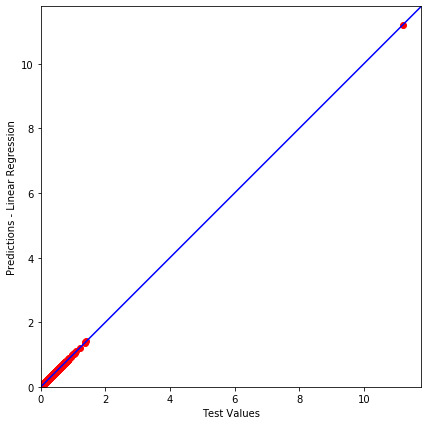

In [108]:
"""
    Plotando o gráfico das predições do modelo treinando contra os reais valores esperados pelos casos de teste.
"""
linear_pred = model_linear.predict(x_test_scal)
#Verificando o procesamento de cpu e memória.
process_cust(cust_process_predict,'Linear Regression')

graphics_plot(y_test_scal, linear_pred, 'Linear Regression')

### Decision Tree

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
tree_reg = DecisionTreeRegressor()

In [111]:
#Dados brutos
#tree_reg.fit(x_train, y_train)


#Dados Normalizados
tree_reg.fit(x_train_scal, y_train_scal)

#Verificando o procesamento de cpu e memória.
process_cust(cust_process_fit,'Decision Tree')

In [112]:
print('Métricas de Validação Decision Tree:\n')
#metrics_validation(tree_reg, x_train, y_train, x_test, y_test)

#Dados Normalizados
metrics_validation(tree_reg, x_train_scal, y_train_scal, x_test_scal, y_test_scal)


print('\nCross Validation Decision Tree:\n')
obj_list = cross_validation(tree_reg, X, y, 'Decision Tree')

models_list.append(obj_list)

Métricas de Validação Decision Tree:

R2 Treinamento: 1.0000000
R2 Teste: 0.9744882
MSE:  1.7408905720878726e-08
RMSE:  0.00013194281231229964

Cross Validation Decision Tree:

Scores:  [0.99897624 0.92196915 0.95171562 0.92931178 0.99153901]
Média Scores: 0.958702
Desvio Padrão: 0.031503


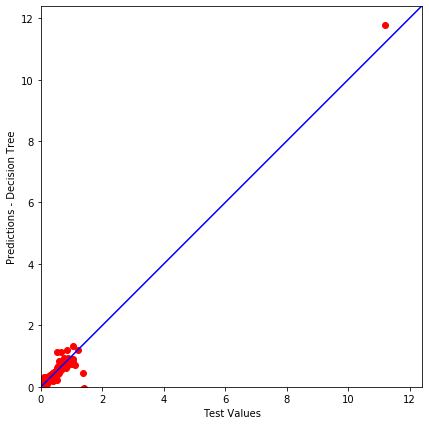

In [113]:
"""
    Plotando o gráfico das predições do modelo treinando contra os reais valores esperados pelos casos de teste.
"""
decision_tree_pred = tree_reg.predict(x_test_scal)
#Verificando o procesamento de cpu e memória.
process_cust(cust_process_predict,'Decision Tree')

graphics_plot(y_test_scal, decision_tree_pred, 'Decision Tree')



### Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
forest_reg = RandomForestRegressor()

In [116]:
#Dados Brutos
#forest_reg.fit(x_train, y_train)

#Dados Normalizados
forest_reg.fit(x_train_scal, y_train_scal)

#Verificando o procesamento de cpu e memória.
process_cust(cust_process_fit,'Random Forest')

/home/thales/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [117]:
print('Métricas de Validação Random Forest:\n')
#Dados Brutos
#metrics_validation(forest_reg, x_train, y_train, x_test, y_test)

#Dados Normalizados
metrics_validation(forest_reg, x_train_scal, y_train_scal, x_test_scal, y_test_scal)


print('\nCross Validation Random Forest:\n')
obj_list = cross_validation(forest_reg, X, y, 'Random Forest')

models_list.append(obj_list)

Métricas de Validação Random Forest:

R2 Treinamento: 0.9760231
R2 Teste: 0.9461833
MSE:  0.02397690863114033
RMSE:  0.1548447888407625

Cross Validation Random Forest:



/home/thales/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/thales/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/thales/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/thales/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConvers

Scores:  [0.9097744  0.88067408 0.92642466 0.81975117 0.99558618]
Média Scores: 0.906442
Desvio Padrão: 0.057509


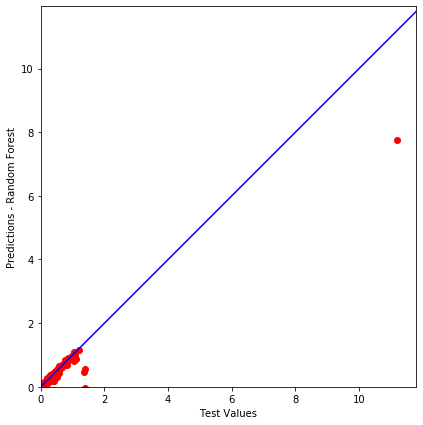

In [118]:
"""
    Plotando o gráfico das predições do modelo treinando contra os reais valores esperados pelos casos de teste.
"""
random_forest_pred = forest_reg.predict(x_test_scal)

#Verificando o procesamento de cpu e memória.
process_cust(cust_process_predict,'Random Forest')

graphics_plot(y_test_scal, random_forest_pred, 'Random Forest')



### ElasticNet

In [119]:
from sklearn.linear_model  import ElasticNet

In [120]:
reg_net = ElasticNet()

In [121]:
#Dados Brutos
#reg_net.fit(x_train, y_train)


#Dados Normalizados
reg_net.fit(x_train_scal, y_train_scal)


#Verificando o procesamento de cpu e memória.
process_cust(cust_process_fit,'Elastic Net')

In [122]:
print('Métricas de Validação ElasticNet:\n')
#Dados Brutos
#metrics_validation(reg_net, x_train, y_train, x_test, y_test)

#Dados Normalizados
metrics_validation(reg_net, x_train_scal, y_train_scal, x_test_scal, y_test_scal)



print('\nCross Validation ElasticNet:\n')
obj_list = cross_validation(reg_net, X, y, 'ElasticNet')

models_list.append(obj_list)

Métricas de Validação ElasticNet:

R2 Treinamento: 0.4972440
R2 Teste: 0.2729248
MSE:  0.5027560260886628
RMSE:  0.7090529078204691

Cross Validation ElasticNet:

Scores:  [0.8913778  0.62030313 0.6437166  0.83159771 0.23946813]
Média Scores: 0.645293
Desvio Padrão: 0.228293


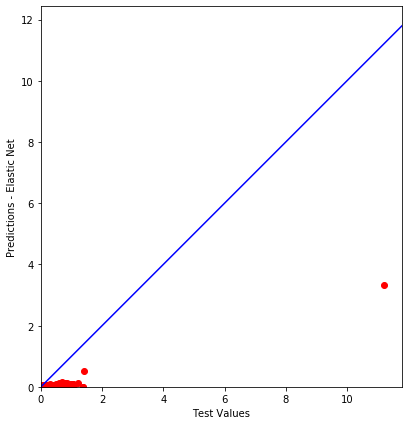

In [123]:
"""
    Plotando o gráfico das predições do modelo treinando contra os reais valores esperados pelos casos de teste.
"""
elastic_net_pred = reg_net.predict(x_test_scal)
#Verificando o procesamento de cpu e memória.
process_cust(cust_process_predict,'Elastic Net')

graphics_plot(y_test_scal, elastic_net_pred, 'Elastic Net')



### SVM Regressão(SVR)

In [124]:
from sklearn.svm import SVR

In [125]:
svr_model = SVR(kernel='poly', degree=3, C=100, epsilon=0.1, coef0=1)

In [126]:
#Dados Brutos
#svr_model.fit(x_train, y_train)

#Dados Normalizados
svr_model.fit(x_train_scal, y_train_scal)

#Verificando o procesamento de cpu e memória.
process_cust(cust_process_fit,'SVR')

/home/thales/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
print('Métricas de Validação SVR:\n')

#Dados Brutos
#metrics_validation(svr_model, x_train, y_train, x_test, y_test)

#Dados Normalizados
metrics_validation(svr_model, x_train_scal, y_train_scal, x_test_scal, y_test_scal)

print('\nCross Validation SVR:\n')
obj_list = cross_validation(svr_model, X, y, 'SVR')

models_list.append(obj_list)

Métricas de Validação SVR:

R2 Treinamento: 0.9963913
R2 Teste: 0.9460883
MSE:  0.0036087388457557643
RMSE:  0.060072779574078014

Cross Validation SVR:



/home/thales/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thales/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thales/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thales/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Scores:  [0.99854134 0.9175887  0.9418608  0.84864899 0.95028447]
Média Scores: 0.931385
Desvio Padrão: 0.049015


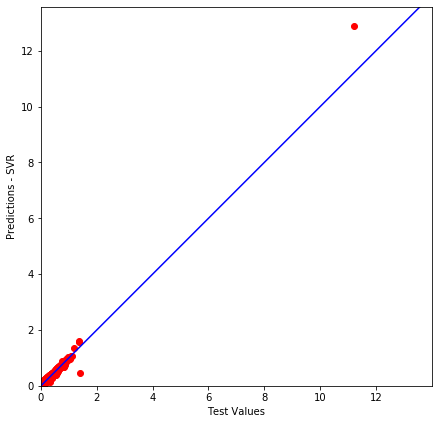

In [128]:
"""
    Plotando o gráfico das predições do modelo treinando contra os reais valores esperados pelos casos de teste.
"""


svr_pred = svr_model.predict(x_test_scal)
#Verificando o procesamento de cpu e memória.
process_cust(cust_process_predict,'SVR')

graphics_plot(y_test_scal, svr_pred, 'SVR')



Consultando a lista com os modelos e seus respectivos scores, utilizando a técnica de cross-validation.

In [129]:
models_list = sorted(models_list, key=lambda k: k['score'], reverse=True) 
models_list

[{'nome': 'Linear Regression', 'score': 0.999999433765327},
 {'nome': 'Decision Tree', 'score': 0.9587023599719103},
 {'nome': 'SVR', 'score': 0.9313848580070079},
 {'nome': 'Random Forest', 'score': 0.9064421000354441},
 {'nome': 'ElasticNet', 'score': 0.6452926749381399}]


Ao se fazer a verificação dos scores obtidos com o cross-validation nos modelos de machine learning utilizados, verifica-se que o modelo que obteve maior sucesso foi o modelo de regressão linear.

Verificando os valores de custo de processamento e memória:

In [130]:
[process_fit_list_cpu, process_fit_list_ram] = [sorted(cust_process_fit, key=lambda k:k['cpu']), sorted(cust_process_fit, key=lambda k:k['ram_memory'])]
[process_predict_list_cpu, process_predict_list_ram] = [sorted(cust_process_predict, key=lambda k:k['cpu']), sorted(cust_process_predict, key=lambda k:k['ram_memory'])]

In [131]:
"""
    Função para visualização dos dados em gráfico de barra.
"""

def graphic_bar(list_process, value, name_arr):
    fig=plt.figure(figsize=(10,7))
    name=[]
    value_l=[]
    type_val =  1 if value == 'cpu' else 2
    for i in list_process:
        name.append(list(i.values())[0])    
        value_l.append(list(i.values())[type_val])
    plt.bar(name, value_l)
    plt.savefig('graphics-{}.png'.format(name_arr), format='png')
    plt.show()

In [132]:
print('Treinamento - Classificação por cpu(menos custoso para o mais custoso)')
process_fit_list_cpu


Treinamento - Classificação por cpu(menos custoso para o mais custoso)


[{'model': 'Elastic Net', 'cpu': 18.0, 'ram_memory': 34.3},
 {'model': 'Linear Regression', 'cpu': 22.8, 'ram_memory': 34.0},
 {'model': 'Random Forest', 'cpu': 31.8, 'ram_memory': 34.1},
 {'model': 'SVR', 'cpu': 32.0, 'ram_memory': 34.5},
 {'model': 'Decision Tree', 'cpu': 32.2, 'ram_memory': 34.0}]

In [133]:
cust_process_fit

[{'model': 'Linear Regression', 'cpu': 22.8, 'ram_memory': 34.0},
 {'model': 'Decision Tree', 'cpu': 32.2, 'ram_memory': 34.0},
 {'model': 'Random Forest', 'cpu': 31.8, 'ram_memory': 34.1},
 {'model': 'Elastic Net', 'cpu': 18.0, 'ram_memory': 34.3},
 {'model': 'SVR', 'cpu': 32.0, 'ram_memory': 34.5}]

In [134]:
cust_process_predict

[{'model': 'Linear Regression', 'cpu': 35.6, 'ram_memory': 34.0},
 {'model': 'Decision Tree', 'cpu': 38.1, 'ram_memory': 34.0},
 {'model': 'Random Forest', 'cpu': 39.6, 'ram_memory': 34.3},
 {'model': 'Elastic Net', 'cpu': 32.5, 'ram_memory': 34.4},
 {'model': 'SVR', 'cpu': 38.1, 'ram_memory': 34.2}]

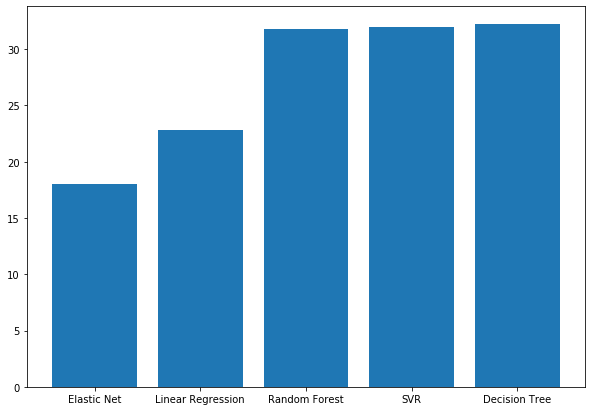

In [135]:
graphic_bar(process_fit_list_cpu, 'cpu', 'treinamentoProcessador')

In [136]:
print('Treinamento - Classificação por ram(menos custoso para o mais custoso)')
process_fit_list_ram

Treinamento - Classificação por ram(menos custoso para o mais custoso)


[{'model': 'Linear Regression', 'cpu': 22.8, 'ram_memory': 34.0},
 {'model': 'Decision Tree', 'cpu': 32.2, 'ram_memory': 34.0},
 {'model': 'Random Forest', 'cpu': 31.8, 'ram_memory': 34.1},
 {'model': 'Elastic Net', 'cpu': 18.0, 'ram_memory': 34.3},
 {'model': 'SVR', 'cpu': 32.0, 'ram_memory': 34.5}]

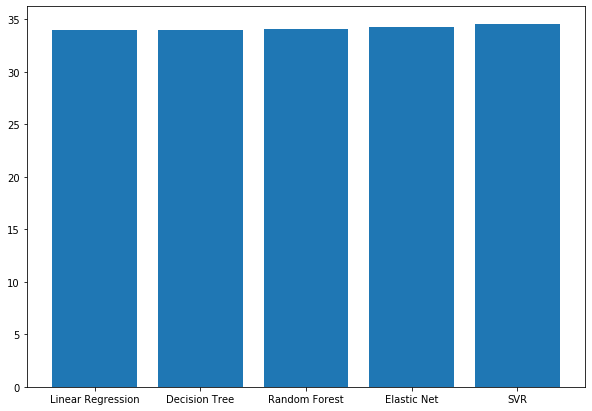

In [137]:
graphic_bar(process_fit_list_ram, 'ram', 'treinamentoMemoria')

In [138]:
print('Predição - Classificação por cpu(menos custoso para o mais custoso)')
process_predict_list_cpu

Predição - Classificação por cpu(menos custoso para o mais custoso)


[{'model': 'Elastic Net', 'cpu': 32.5, 'ram_memory': 34.4},
 {'model': 'Linear Regression', 'cpu': 35.6, 'ram_memory': 34.0},
 {'model': 'Decision Tree', 'cpu': 38.1, 'ram_memory': 34.0},
 {'model': 'SVR', 'cpu': 38.1, 'ram_memory': 34.2},
 {'model': 'Random Forest', 'cpu': 39.6, 'ram_memory': 34.3}]

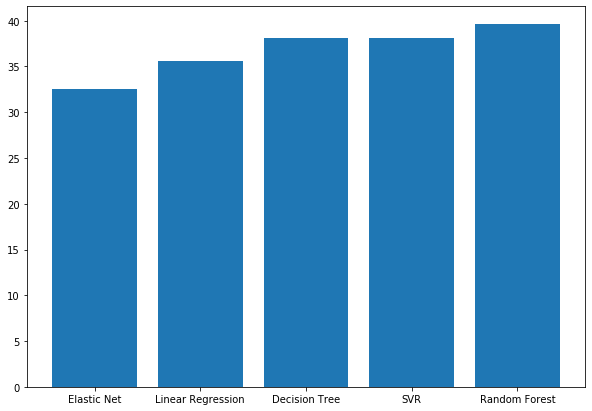

In [139]:
graphic_bar(process_predict_list_cpu, 'cpu', 'testeProcessador')

In [140]:
print('Predição - Classificação por ram(menos custoso para o mais custoso)')
process_predict_list_ram

Predição - Classificação por ram(menos custoso para o mais custoso)


[{'model': 'Linear Regression', 'cpu': 35.6, 'ram_memory': 34.0},
 {'model': 'Decision Tree', 'cpu': 38.1, 'ram_memory': 34.0},
 {'model': 'SVR', 'cpu': 38.1, 'ram_memory': 34.2},
 {'model': 'Random Forest', 'cpu': 39.6, 'ram_memory': 34.3},
 {'model': 'Elastic Net', 'cpu': 32.5, 'ram_memory': 34.4}]

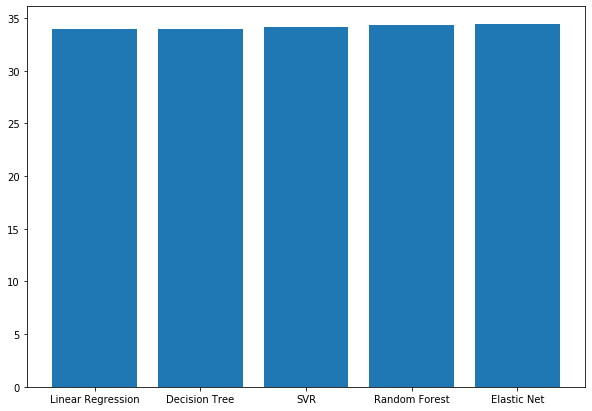

In [141]:
graphic_bar(process_predict_list_ram, 'ram', 'testeMemoria')

# Modelos de Redes Neurais

* MLP

In [142]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

### MLP

In [143]:
learning_rate = 0.001
# batch_size = 256
epochs_value = 150

In [144]:
# def build_models():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(1)
#     ])
    
#     optimizer = keras.optimizers.RMSprop(0.01)
    
#     model.compile(
#                     loss='mse',
#                     optimizer=optimizer,
#                     metrics=['mae', 'mse']
#                  )
    
#     return model

Melhores funções de ativação para a camada de saída:
* SELU
* SOFTPLUS
* SWISH

In [145]:
"""
    Configuração da Rede MLP:
    -> Rede MLP utilizando uma camada de entrada com o tamanho da entrada igual à 
       quantidade de variáveis no dataset de entrada;
    -> Uma camada oculta da rede;
    -> Camada de saída com apenas 1 valor, igual a dimensionalidade do valor de saída do dataset;
    
    Em que:
    * Quantidade de épocas setadas na variável epochs_value
    * Taxa de aprendizado da rede está setada na variável learning_rate
    * Função de ativação na camada de saída ELU => Exponential Linear Unit
"""

model_mlp = Sequential()
model_mlp.add(Dense(32, input_shape=[x_train_scal.shape[1]], activation='relu'))
model_mlp.add(Dense(16, activation='relu'))
model_mlp.add(Dense(y_train_scal.shape[1], activation='softplus'))#activation='swish'))#activation='selu'))#activation='softplus'))

In [146]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [147]:
model_mlp.compile(optimizer=keras.optimizers.RMSprop(learning_rate),loss='mse', metrics=['mae','mse'])

In [148]:
model_mlp.fit(x_train_scal, y_train_scal, epochs=epochs_value, validation_split=0.2)
process_cust(cust_process_fit,'MLP')

Epoch 1/150
188/188 [==============================] - 1s 6ms/step - loss: 0.7219 - mae: 0.3108 - mse: 0.7219 - val_loss: 2.4190 - val_mae: 0.1875 - val_mse: 2.4190
Epoch 2/150
188/188 [==============================] - 1s 4ms/step - loss: 0.6041 - mae: 0.1413 - mse: 0.6041 - val_loss: 2.3812 - val_mae: 0.1762 - val_mse: 2.3812
Epoch 3/150
188/188 [==============================] - 1s 4ms/step - loss: 0.5723 - mae: 0.1340 - mse: 0.5723 - val_loss: 1.8357 - val_mae: 0.1644 - val_mse: 1.8357
Epoch 4/150
188/188 [==============================] - 1s 4ms/step - loss: 0.3551 - mae: 0.1288 - mse: 0.3551 - val_loss: 1.2029 - val_mae: 0.1531 - val_mse: 1.2029
Epoch 5/150
188/188 [==============================] - 1s 4ms/step - loss: 0.3049 - mae: 0.1252 - mse: 0.3049 - val_loss: 0.9752 - val_mae: 0.1467 - val_mse: 0.9752
Epoch 6/150
188/188 [==============================] - 1s 4ms/step - loss: 0.2203 - mae: 0.1224 - mse: 0.2203 - val_loss: 0.6836 - val_mae: 0.1411 - val_mse: 0.6836
Epoch 7/15

Fazendo verificação da taxa de erro nas predições da rede.

In [149]:
pred_mlp = model_mlp.predict(x_test_scal).flatten()
process_cust(cust_process_predict,'MLP')

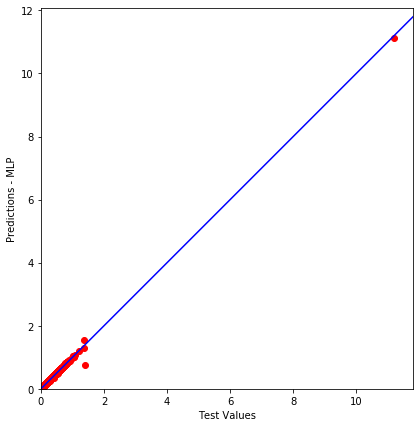

In [150]:
graphics_plot(y_test_scal, pred_mlp, 'MLP')

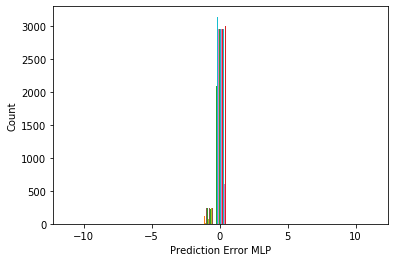

In [151]:
error_mlp = pred_mlp - y_test_scal
plt.hist(error_mlp, bins = 25)
plt.xlabel("Prediction Error MLP")
_ = plt.ylabel("Count")
# plt.savefig('error_predicao-MLP.svg', format='svg')
plt.savefig('error_predicao-MLP.png', format='png')
plt.show()

    ->Taxa de Acerto:
    Dentre os valores obtidos para minimizar o erro, o modelo que teve a melhor performance foi a Linear Regression.

    -> Processamento:
    Nos testes verificados, obtemos que dentre os modelos mais simples
    (Linear Regression, Decision Tree, Random Forest, Elastic Net e SVR), 
    o modelo, que possui o menor custo em processamento para o Processador
    ficou entre o SVR e o Decision Tree, já em questão de consumo de memória ram,
    O que tem um menor custo ficou com a Linear Regression.


    -> Verificação Final:
    Tendo em mente os custos de processamento e também a de taxa de acerto, verifica-se que o melhor modelo para ter uma boa performance no problema em questão ficou para a linear regression, pois além da alta taxa de acerto e baixo processamento, o algoritmo é muito simples e de fácil visualização das suas necessidades para configuração.


a) Qual a melhor técnica (acurácia)?

Pela acurácia dos modelos, a melhor técnica é a de Regressão Linear.

b) Qual técnica é mais eficiente (custo de processamento)?

->No quesito de custo pela porcentagem de uso do processador temos:

* Para o conjunto de treinamento:MLP

* Para o conjunto de teste: MLP

->No quesito de custo pela porcentagem de uso de memória, temos:

* Para o conjunto de treinamento: empate entre Regressão Linear e Árvore de Decisão.

* Para o conjunto de teste: Arvore de Decisão e em seguida a Regressão Linear.

c) Qual ténica se mostrou mais apropriada para o problema em questão? Porque?

Pela alta taxa de acerto, baixo custo de processamento no uso de memória e mediano no uso do processador.
Além do fato de ser uma técnica extremamente simples para a sua utilização.

d) Você processou os dados? (normalizou, excluiu features, etc)

Sim, features categóricas foram convertidas para numéricas e os dados foram normalizados para a utilização.

# Salvando o modelo de regressão linear para ser transformado em API utilizando o fast api

In [152]:
# from sklearn.externals import joblib

In [153]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [154]:
import joblib 

In [155]:
joblib.dump(model_linear, 'linear_model.pkl')

['linear_model.pkl']

Exemplo de uso do modelo

In [166]:
300

test_array = [[0, 440, 3, 2, 2, 10, 1, 1, 3000, 4000, 400, 120]]


In [167]:

model_linear.predict(test_array)

array([[3659.91975417]])